# Fake News Detection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Collection

In [2]:
df = pd.read_csv('/content/fake news.csv')
df.shape

(12520, 2)

In [3]:
df.head()

,text,label
0,sing praise mahinda lose voice sri lanka disro...,1
1,kojc rally first time davao city appoint son god,1
2,bill gate people resist mrna tsunami exclude s...,1
3,cure covid19 forward budesonide asthma drug pl...,1
4,president trump form patriot party 81 day elec...,1


### Data Preprocessing

In [4]:
df.isnull().sum()

,0
text,0
label,0


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

print("NLTK packages downloaded and text cleaning function defined.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


NLTK packages downloaded and text cleaning function defined.


In [6]:
df['cleaned_text'] = df['text'].apply(clean_text)
df.head()

,text,label,cleaned_text
0,sing praise mahinda lose voice sri lanka disro...,1,sing praise mahinda lose voice sri lanka disro...
1,kojc rally first time davao city appoint son god,1,kojc rally first time davao city appoint son god
2,bill gate people resist mrna tsunami exclude s...,1,bill gate people resist mrna tsunami exclude s...
3,cure covid19 forward budesonide asthma drug pl...,1,cure covid19 forward budesonide asthma drug pl...
4,president trump form patriot party 81 day elec...,1,president trump form patriot party 81 day elec...


## Feature Extraction



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting to 5000 features for demonstration
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF vectorization complete. Shape of features (X):", X.shape)

TF-IDF vectorization complete. Shape of features (X): (12520, 5000)


## Split Data into Training and Testing Sets



In [8]:
from sklearn.model_selection import train_test_split

y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (10016, 5000)
Shape of X_test: (2504, 5000)
Shape of y_train: (10016,)
Shape of y_test: (2504,)


## Model Training


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=42) # Added random_state for reproducibility
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Model Evaluation





In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9221
Precision: 0.9161
Recall: 0.9522
F1-Score: 0.9338

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1059
           1       0.92      0.95      0.93      1445

    accuracy                           0.92      2504
   macro avg       0.92      0.92      0.92      2504
weighted avg       0.92      0.92      0.92      2504


Confusion Matrix:
[[ 933  126]
 [  69 1376]]


## Visualize Results



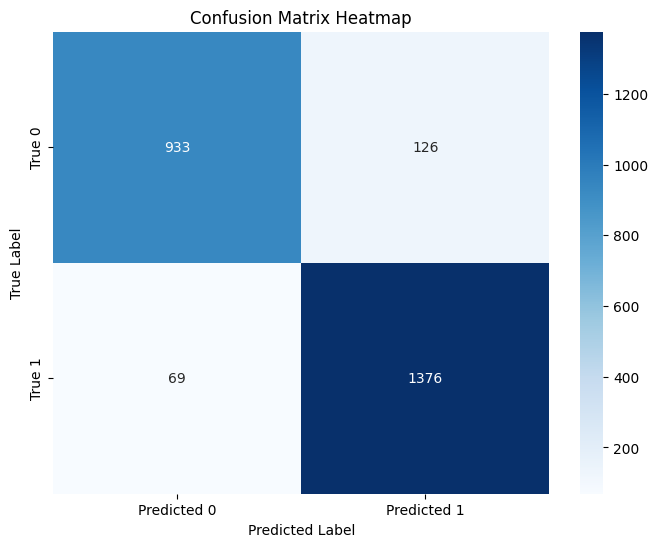

Confusion matrix heatmap displayed successfully.


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Re-calculate confusion matrix (it was already calculated but good practice to show)
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix heatmap displayed successfully.")